![alt text](sparks.png "Title")
# Graduate Rotational Internship Program 
# TASK-2

## To explore Supervised Machine Learning

### Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## 1.Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## 2.Importing and Exploring Dataset

In [21]:
df = pd.read_csv("student_scores - student_scores.csv")
print('Number of rows and columns is the dataset is:',df.shape)
df.head(3)

Number of rows and columns is the dataset is: (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [3]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [26]:
print('Description about the dataset:')
df.describe()

Description about the dataset:


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Understanding the dataset

The dataset consists of two columns, Hours and Scores. The datatype of Hours is float64, while the datatype of Scores 
is int64. The dataset contains 25 datas. The Hours is the feature variable, and the Scores is the target variable. The
dataset contains the Scores secured by a student based on the time (Hours) he spent for studying. 

## 3.Visualizing Data

Text(0.5, 1.0, 'Hours Vs Scores')

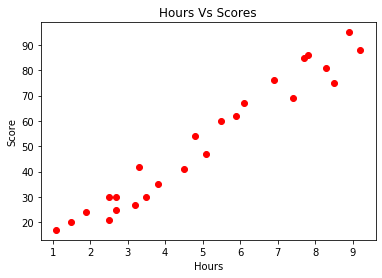

In [62]:
plt.scatter(df['Hours'],df['Scores'],color='red',marker='o')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Hours Vs Scores")

From the above graph, it can be seen that the Hours and Percenatge Scores are positively correlated.

In [6]:
print('The correlation between Hours and Scores is:',df['Scores'].corr(df['Hours']))

The correlation between Hours and Scores is: 0.9761906560220887


## 4.Data Preprocessing and Modelling

Splitting the dataset as Feature and Target Variable  

In [7]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1:].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) 
print("X train shape:",X_train.shape)
print("y train shape:",y_train.shape)
print("X test shape:",X_test.shape)
print("y test shape:",y_test.shape)

X train shape: (17, 1)
y train shape: (17, 1)
X test shape: (8, 1)
y test shape: (8, 1)


#### 4.1.Model 1-Simple Linear Regression

Importing the Linear regression model for the Scikit learn package.

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)
print("Training is completed")

Training is completed


In [32]:
y_pred1 = lr.predict(X_test)
print('The accuracy of the model is:',lr.score(X_test,y_test)*100,'%')
print("The equation of model is:  Score=",lr.coef_[0],'+',lr.intercept_,'*Hours')

The accuracy of the model is: 95.68211104435257 %
The equation of model is:  Score= [9.78856669] + [2.37081538] *Hours


The MSE using Linear Regression is 22.96509721270043


[Text(0.5, 1.0, 'Linear Regression')]

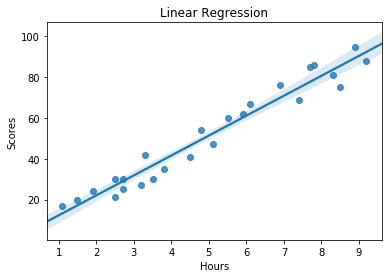

In [40]:
print('The MSE using Linear Regression is',metrics.mean_squared_error(y_test,y_pred1))
ax = sns.regplot(df['Hours'],df['Scores'])
ax.set(title='Linear Regression')

#### 4.2.Model 2-Using Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor 

In [37]:
rf = RandomForestRegressor(n_estimators=6,criterion='mse',random_state=0)
rf.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=6, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [38]:
y_pred2 = rf.predict(X_test)
print('The accuracy of the Random Forest Regressor model is:',rf.score(X_test,y_test)*100,'%')

The accuracy of the Random Forest Regressor model is: 91.75586174029137 %


The MSE using Random Forest Regression is 43.8472222222222


Text(0.5, 1.0, 'Random Forest Regression')

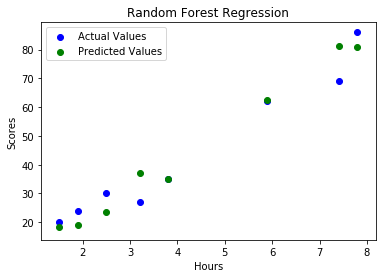

In [58]:
print('The MSE using Random Forest Regression is',metrics.mean_squared_error(y_test,y_pred2))
plt.scatter(X_test,y_test,color='blue',label='Actual Values')
plt.scatter(X_test,y_pred2,color='green',label='Predicted Values')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.title("Random Forest Regression")

#### 4.3.Model 3-Ridge Regression

Hyper Parameter Tuning is to be done to find the best value of parameter alpha. α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alpha = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
alpha

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [50]:
ridge = Ridge()
Grid = GridSearchCV(ridge, alpha,cv=4)

In [52]:
Grid.fit(X_train,y_train)
best_fit=Grid.best_estimator_
best_fit

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [55]:
y_pred3 = best_fit.predict(X_test)
print('The accuracy of the Ridge Regression model is:',best_fit.score(X_test,y_test)*100,'%')

The accuracy of the Ridge Regression model is: 95.68176284158577 %


The MSE using Ridge Regression is 22.966949161759736


Text(0.5, 1.0, 'Ridge Regression')

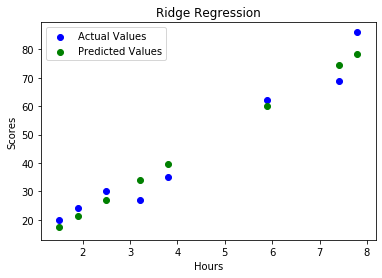

In [59]:
print('The MSE using Ridge Regression is',metrics.mean_squared_error(y_test,y_pred3))
plt.scatter(X_test,y_test,color='blue',label='Actual Values')
plt.scatter(X_test,y_pred3,color='green',label='Predicted Values')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.title("Ridge Regression")

## Selecting the Best Model:

In [68]:
df2 = pd.DataFrame({'Model':['Linear Regression','Random Forest Regressor','Ridge Regression'],'MSE':[metrics.mean_squared_error(y_test,y_pred1),metrics.mean_squared_error(y_test,y_pred2),metrics.mean_squared_error(y_test,y_pred3)]})
df2

,Model,MSE
0,Linear Regression,22.965097
1,Random Forest Regressor,43.847222
2,Ridge Regression,22.966949


## 5.Predicting the Score of a student who studied for 9.25 Hours 

Since the Linear Regression model has the least MSE, we choose Linear Regression model to predict the output (Score). 

In [70]:
y_ans = lr.predict(np.array(9.25).reshape(-1,1))
print("The predicted score of a student who studies for 9.25 hours is",round(y_ans[0,0],1),'%')

The predicted score of a student who studies for 9.25 hours is 92.9 %


## 6.Inference

In this Task-2, we have predicted the score of a student based on the hours he spent for studying. Three models, Linear regression, Random Forest and Ridge regression are uesd to predict the best fit model based on the MSE Evaulation Metric. Of the three, the Linear Regression has the least MSE compared to the other two and the Random Forest has the highest MSE.  

It is predicted that a student scores 92.9%, if he spends 9.25 hours for study. 